<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Dudziak/Drzewa_losowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ładowanie potrzebnych bibliotek
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Tworznie datasetu, wraz z gatunkami irysów i cechami pojedynczych roślin
data = datasets.load_iris()

features = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["target"])

df = pd.concat([features, target], axis=1)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: title={'center': 'petal width (cm)'}, ylabel='Frequency'>

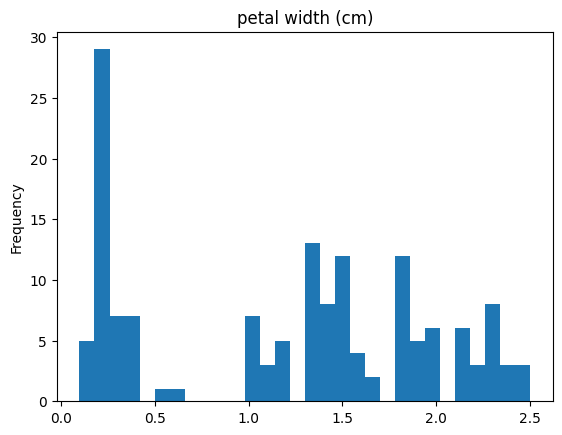

In [48]:
# Wizualizujemy PetalWidthCm
df['petal width (cm)'].plot(kind='hist', bins=30, title='petal width (cm)')

<Axes: title={'center': 'petal length (cm)'}, ylabel='Frequency'>

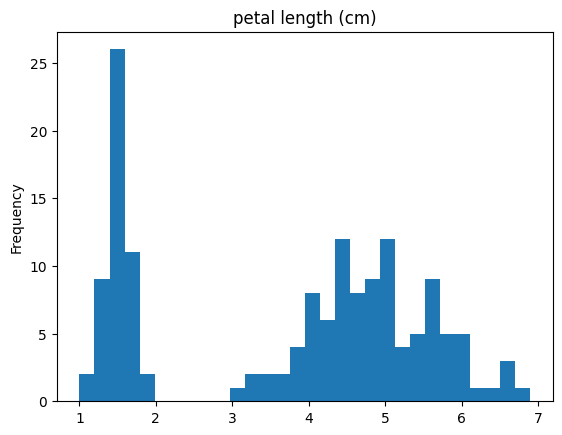

In [30]:
# Wizualizujemy PetalLengthCm
df['petal length (cm)'].plot(kind='hist', bins=30, title='petal length (cm)')

In [ ]:
# Entropia przed podziałem (0.5)
# False w normalize dałby nam liczebności danych gatunków irysów, a nie ich stosunki
target_probs = df["target"].value_counts(normalize=True)
ent_before_divison = -sum(target_probs * target_probs.map(lambda p: math.log(p, 2)))
print(f'Entropia przed podziałem: {ent_before_divison}')
# Entropia po podziale (0.5)
# 1. Podział na wiersze w zależności od spełnienia warynku
narrower = df[df["petal width (cm)"] <= 0.5]
wider = df[df["petal width (cm)"] > 0.5]

# 2. Obliczenie entropi po podziale na węższe i szersze płatki
entropy_A = -sum(narrower["target"].value_counts(normalize=True) * narrower["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2)))
entropy_B = -sum(wider["target"].value_counts(normalize=True) * wider["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2)))

avg_ent = (entropy_A + entropy_B) / 2
print(f'Średnia entropia po podziale: {avg_ent}')

IG = ent_before_divison - avg_ent
print(f'Zysk informacyjny równy: {IG}')

In [ ]:
# Entropia przed podziałem (0.38)
target_probs = df["target"].value_counts(normalize=True)
ent_before_divison = -sum(target_probs * target_probs.map(lambda p: math.log(p, 2)))
print(f'Entropia przed podziałem: {ent_before_divison}')
# Entropia po podziale (0.38)
# 1. Podział na wiersze w zależności od spełnienia warynku
narrower = df[df["petal width (cm)"] <= 0.38]
wider = df[df["petal width (cm)"] > 0.38]

# 2. Obliczenie entropi po podziale na węższe i szersze płatki
entropy_A = -sum(narrower["target"].value_counts(normalize=True) * narrower["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2)))
# print(narrower["target"].value_counts(normalize=False))
entropy_B = -sum(wider["target"].value_counts(normalize=True) * wider["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2)))
avg_ent = (entropy_A + entropy_B) / 2
print(f'Średnia entropia po podziale: {avg_ent}')

IG = ent_before_divison - avg_ent
print(f'Zysk informacyjny równy: {IG}')

In [6]:
# Zaimplementuj:
# 1. drzewo decyzyjne
# 2. las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Tworznie danych treningowych i testowych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Dokładność drzewa decyzyjnego:", accuracy_dt)

random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność:", accuracy_rf)


Dokładność drzewa decyzyjnego: 1.0
Dokładność: 1.0
